# Part 1: Text Processing and Exploratory Data Analysis

G_014

Paula Ceprián (u198630)

Judit Viladecans (u198724)

Berta Noguera (u199893)


## Imports and files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# if you do not have 'nltk', the following command should work "python -m pip install nltk"
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

In [5]:
# Berta's fashion path: /content/drive/MyDrive/5è curs/Labs IRWA/IRWA Labs/PART 1 Final Project/fashion_products_dataset.json
# Berta's validation path: /content/drive/MyDrive/5è curs/Labs IRWA/IRWA Labs/PART 1 Final Project/validation_labels.csv
# Paula's fashion path: /content/drive/MyDrive/Quinto/IRWA/IRWA Labs/PART 1 Final Project/fashion_products_dataset.json
# Paula's validation path: /content/drive/MyDrive/Quinto/IRWA/IRWA Labs/PART 1 Final Project/validation_labels.csv
# Judit's fashion path: /content/drive/MyDrive/5è CURS/IRWA/IRWA Labs/PART 1 Final Project/fashion_products_dataset.json
# Judit's validation path: /content/drive/MyDrive/5è CURS/IRWA/IRWA Labs/PART 1 Final Project/validation_labels.csv

fashion_path = "/content/drive/MyDrive/Quinto/IRWA/IRWA Labs/PART 1 Final Project/fashion_products_dataset.json"
fashion_df = pd.read_json(fashion_path)

validation_path = "/content/drive/MyDrive/Quinto/IRWA/IRWA Labs/PART 1 Final Project/validation_labels.csv"
val_df = pd.read_csv(validation_path)

## Data preparation

In [6]:
# function to elimate stop words and punctuation marks, and to do stemming and tokenization
def build_terms(line):
    """
    Preprocess the article text (title + body) removing stop words, stemming,
    transforming in lowercase, removing punctuation and return the tokens of the text.

    Argument:
    line -- string (text) to be preprocessed

    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    ## START CODE
    line=  line.lower() ## Transform in lowercase
    line= re.sub(r'[^\w\s]', '', line) ## Remove punctuation
    line= re.sub(r'[0-9]', '', line) ## Remove numbers
    #line=  word_tokenize(line, "english") ## Tokenize the text to get a list of terms
    line =  line.split()
    line= [word for word in line if word not in stop_words]  ##eliminate the stopwords (HINT: use List Comprehension)
    line= [stemmer.stem(word) for word in line] ## perform stemming (HINT: use List Comprehension)
    ## END CODE
    return line

In [7]:
def flatten_product_details(details):
    if isinstance(details, list):
        return " ".join(f"{k} {v}" for d in details for k, v in d.items())
    return str(details)

In [8]:
fashion_df['product_details'] = fashion_df['product_details'].apply(flatten_product_details)

In [9]:
fashion_df_text = fashion_df[["brand", "category", "description", "seller", "title", "product_details", "sub_category"]]

In [10]:
for col in fashion_df_text.columns:
  fashion_df_text[col] = fashion_df_text[col].apply(lambda line : build_terms(line))


/tmp/ipython-input-1611451692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fashion_df_text[col] = fashion_df_text[col].apply(lambda line : build_terms(line))


In [11]:
fashion_df_other = fashion_df[["pid", "out_of_stock", "selling_price", "discount", "actual_price", "average_rating", "url"]]

fashion_df_processed = pd.concat([fashion_df_text, fashion_df_other], axis=1)
fashion_df_processed = fashion_df_processed[["pid", "title", "description", "brand", "category", "sub_category", "product_details",
                                             "seller", "out_of_stock", "selling_price", "discount", "actual_price",
                                             "average_rating", "url"]] #order the columns in the desired order

#Part 2: Exploratory Data Analysis

When working with data, it is important to have a better understanding of the content and
some statistics. Provide an exploratory data analysis to describe the dataset you are working on
in this project and explain the decisions made for the analysis. For example, word counting
distribution, average sentence length, vocabulary size, ranking of products based on rating,
price, discount, top sellers and brands, out_of_stock distribution, word clouds for the most
frequent words, and entity recognition. Feel free to do the exploratory analysis and report your
findings in the report.

##Word counting distribution

In [12]:
# We will see the word counting distribution of title and description, as if we pick, for example, brand or seller, it won't be informative

def word_count(df, fields):
  words = {}
  for doc_id, row in df.iterrows():
    for field in fields:
      for word in row[field]:
        if word in words:
          words[word] += 1
        else:
          words[word] = 1

  #we order the dictionary of frequencies by values in descending order
  word_count = dict(sorted(words.items(), key = lambda item:item[1], reverse = True))
  return word_count

In [13]:
def plot_top_10(dic, xlabel, ylabel, color):
    # we order the dictionary by values in descending order and get the top 10
    top_10 = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True)[:10])

    # We obtain the keys and the values
    keys = list(top_10.keys())
    values = list(top_10.values())

    # We create a bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(keys, values, color=color)
    plt.plot(keys, values, color='red', marker='o')
    plt.title('Top 10')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=50)  #We rotate x labels for better visibility
    plt.grid(axis='y')
    plt.tight_layout()  #Avoid overlap
    plt.show()

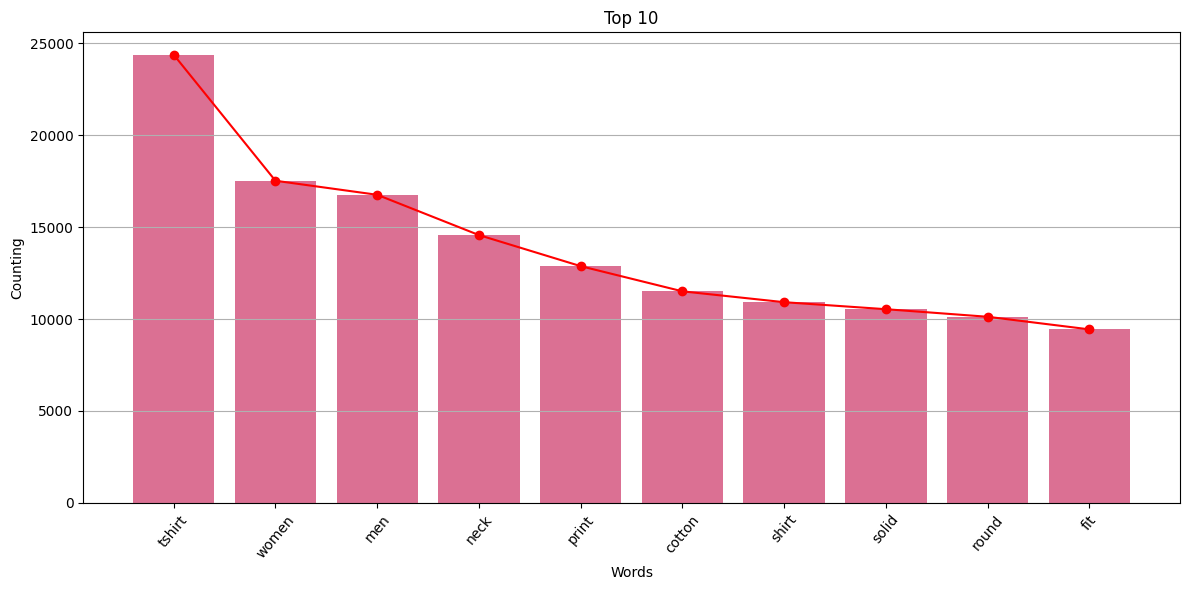

In [22]:
word_ocurrences = word_count(fashion_df_processed, ["title", "description"])
plot_top_10(word_ocurrences, "Words", "Counting", "palevioletred")

## Average Sequence Length

In [15]:
def avg_length(df, field):
  sum = 0
  for doc_id, product in df.iterrows(): #for each product registered
    sum += len(product[field]) #sum the number of tokens
  return sum / df.shape[0]

In [16]:
avg_title_length = avg_length(fashion_df_processed, "title")
avg_description_length = avg_length(fashion_df_processed, "description")
print(f'Average length of the title: {avg_title_length:.2f} words')
print(f'Average length of the description: {avg_description_length:.2f} words')

Average length of the title: 6.05 words
Average length of the description: 18.18 words


## Vocabulary Size

In [17]:
print(f'Vocabulary size of the title and description of the products: {len(word_ocurrences)}')
print(f'Average number of unique words per title: {len(word_ocurrences)/fashion_df_processed.shape[0]:.2f}')
print(f'Average number of unique words per description: {len(word_ocurrences)/fashion_df_processed.shape[0]:.2f}')

Vocabulary size of the title and description of the products: 5778
Average number of unique words per title: 0.21
Average number of unique words per description: 0.21


## Ranking of products

In [18]:
fashion_df.columns

Index(['_id', 'acrice', 'average_ratual_pting', 'brand', 'category',
       'crawled_at', 'description', 'discount', 'images', 'out_of_stock',
       'pid', 'product_details', 'seller', 'selling_price', 'sub_category',
       'title', 'url', 'actual_price', 'average_rating'],
      dtype='object')

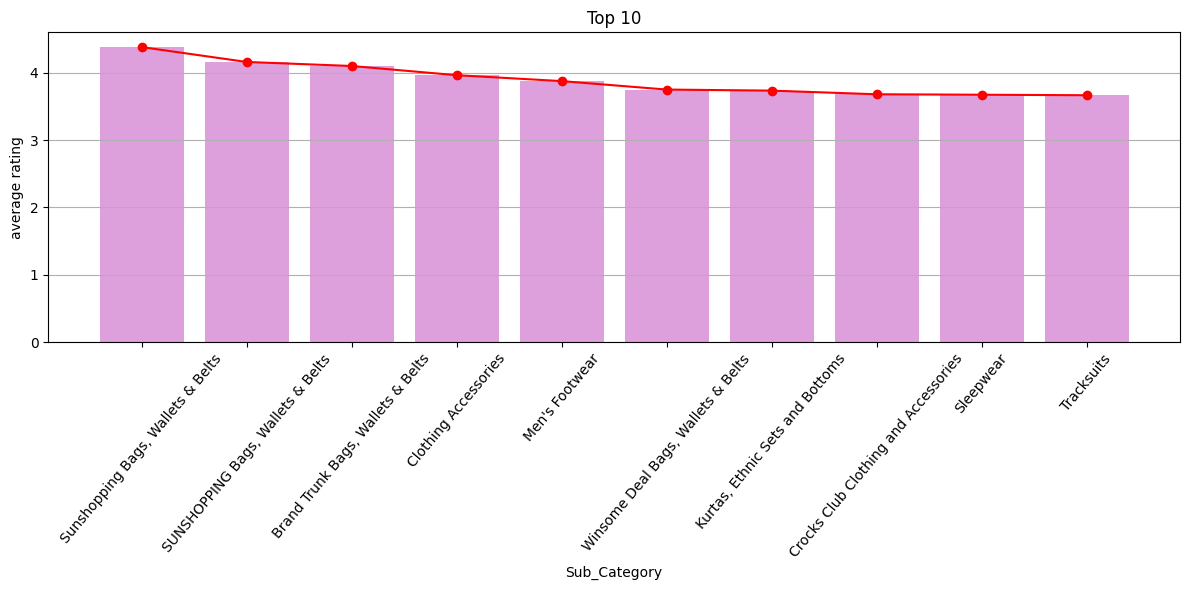

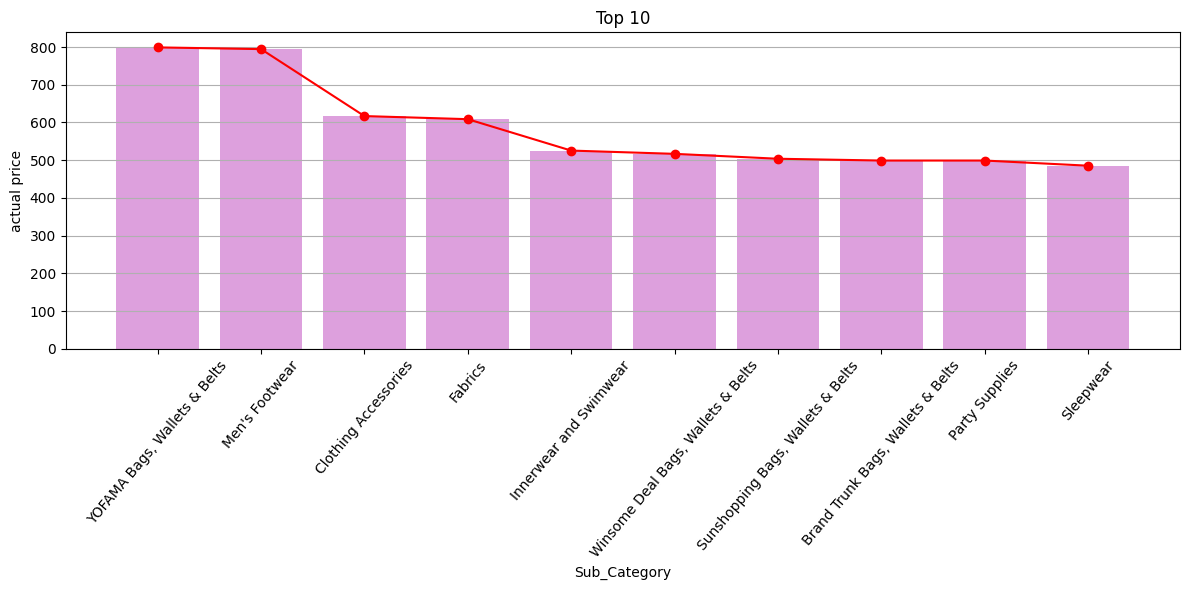

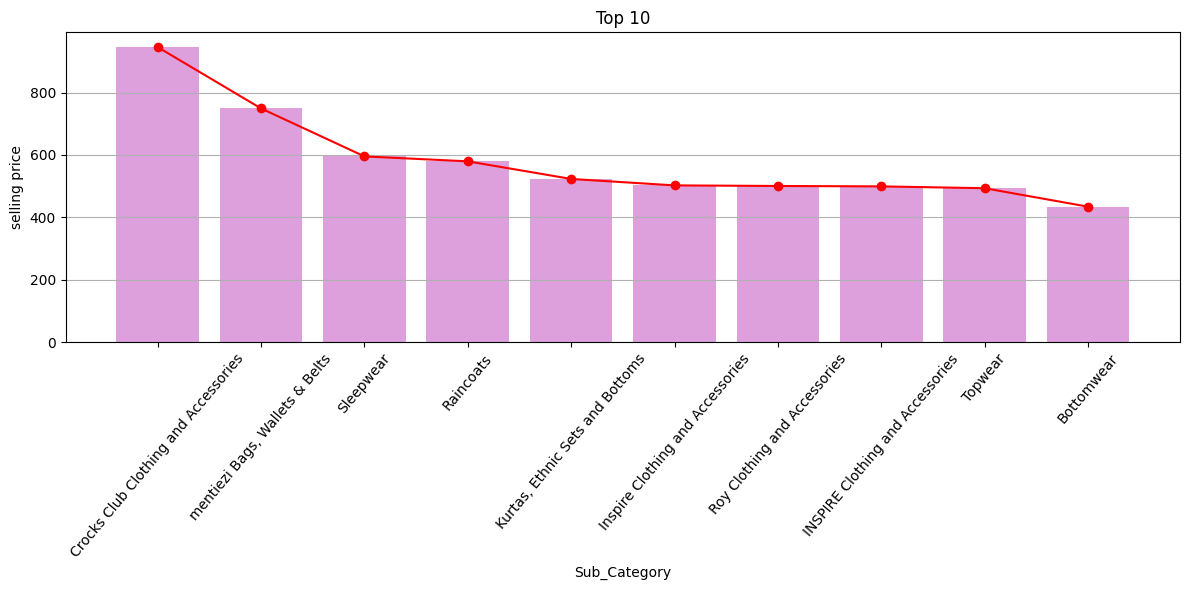

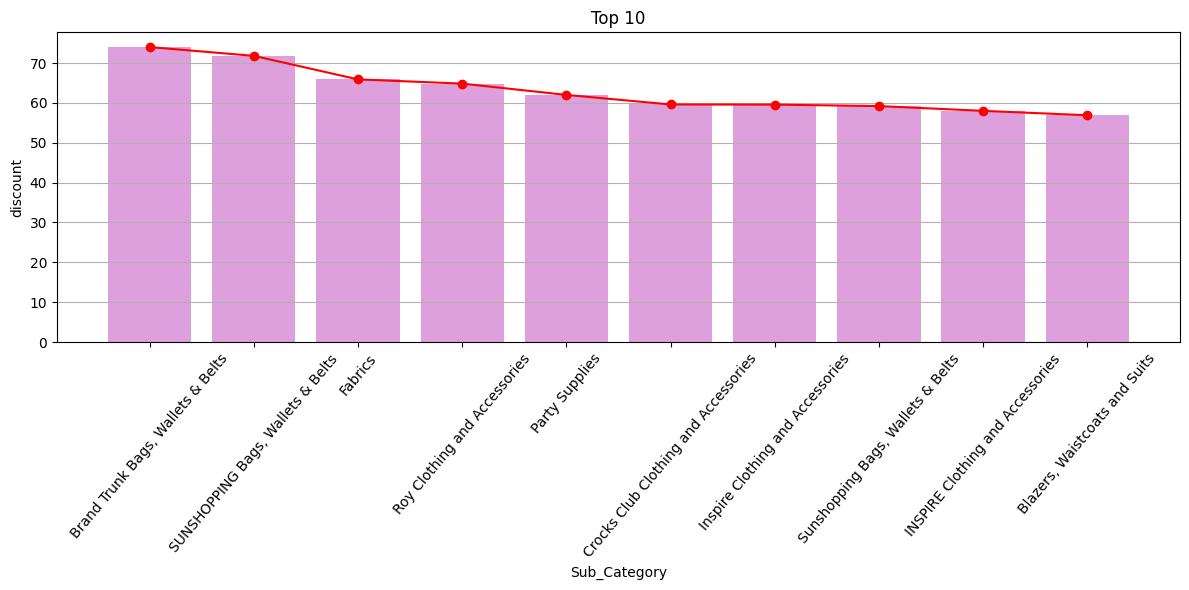

In [19]:
fashion_df_2 = fashion_df.copy()

# Average rating
fashion_df_2 = fashion_df_2[~(fashion_df_2["average_rating"] == "")]
fashion_df_2["average_rating"] = fashion_df_2["average_rating"].dropna().astype(float)

# Actual_price and selling_price
fashion_df_2 = fashion_df_2[~(fashion_df_2["actual_price"] == "")]
fashion_df_2["actual_price"] = fashion_df_2["actual_price"].str.replace(",", ".").astype(float)
fashion_df_2 = fashion_df_2[~(fashion_df_2["selling_price"] == "")]
fashion_df_2["selling_price"] = fashion_df_2["selling_price"].str.replace(",", ".").astype(float)

# Discount
fashion_df_2 = fashion_df_2[~(fashion_df_2["discount"] == "")]
fashion_df_2["discount"] = fashion_df_2["discount"].str.replace("%", "") .str.replace("off", "").str.strip().astype(float)

for column in ["average_rating", "actual_price", "selling_price", "discount"]:
  top_ranking = fashion_df_2.groupby("sub_category")[column].mean().sort_values(ascending=False).to_dict()
  plot_top_10(top_ranking, "Sub_Category", column.replace("_", " "), "plum")

## Top Brands and Sellers

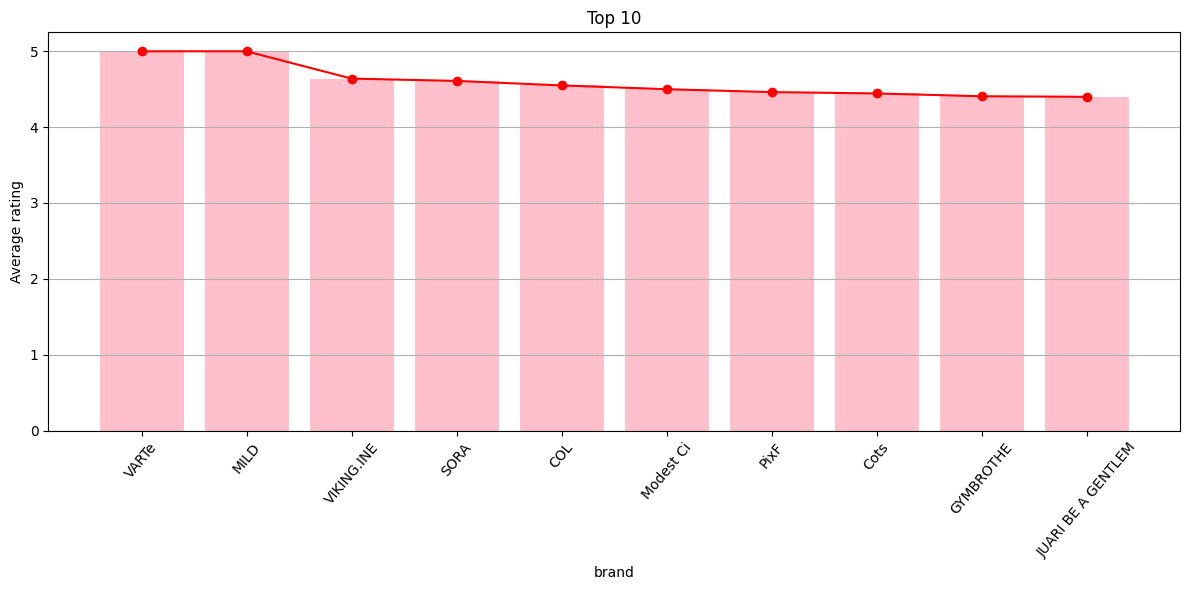

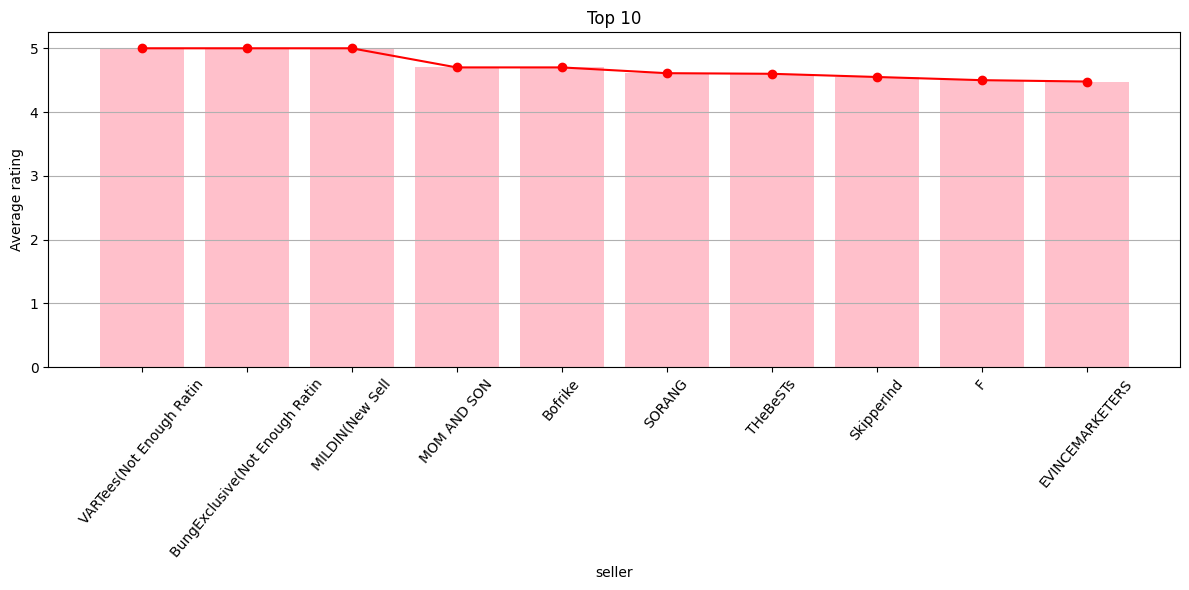

In [ ]:
fashion_df_2 = fashion_df.copy()

fashion_df_2 = fashion_df_2[~(fashion_df_2["average_rating"] == "")]
fashion_df_2["average_rating"] = fashion_df_2["average_rating"].dropna().astype(float)

for column in ["brand", "seller"]:
  top_ranking = fashion_df_2.groupby(column)["average_rating"].mean().sort_values(ascending=False).to_dict()
  plot_top_10(top_ranking, column, "Average rating", "pink")

## Out of stock distribution

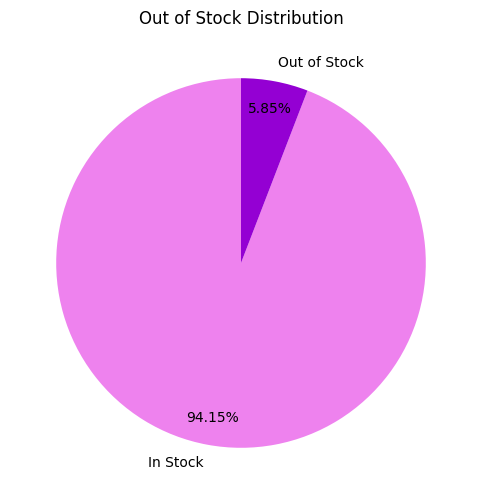

In [21]:
# Count of in-stock vs out-of-stock
stock_counts = fashion_df["out_of_stock"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(stock_counts, labels=["In Stock", "Out of Stock"], autopct="%1.2f%%", pctdistance=0.85, startangle=90, colors=["violet", "darkviolet"])
plt.title("Out of Stock Distribution")
plt.show()

## Word clouds

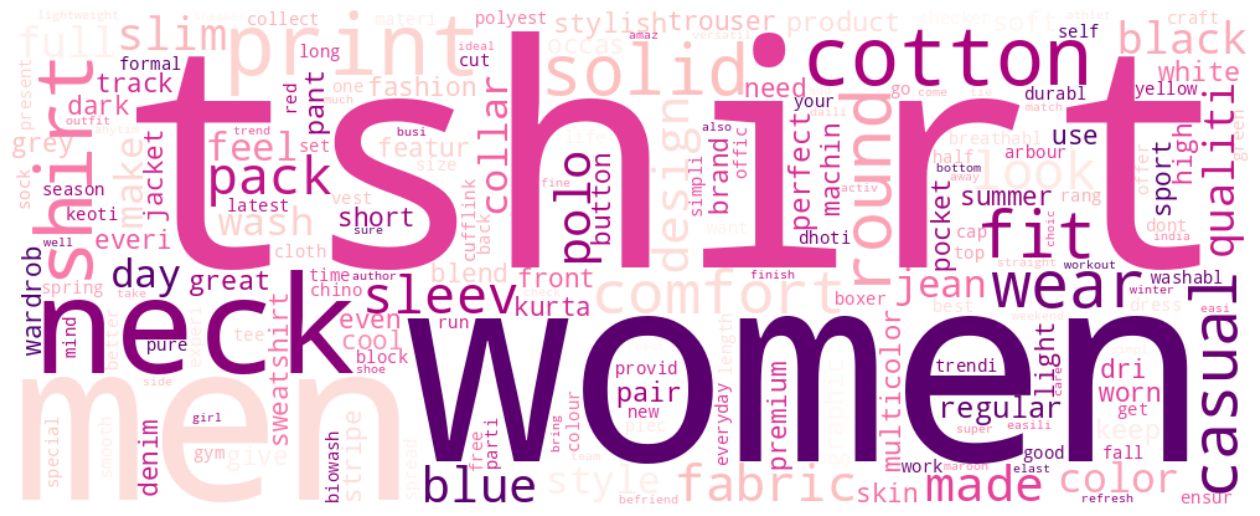

In [ ]:
from wordcloud import WordCloud

fashion_wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap= 'RdPu')
fashion_wordcloud.generate_from_frequencies(dict(word_ocurrences))

f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(fashion_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Entity Recognition (needs improvement)

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

title_data = fashion_df["title"].dropna().unique()
titles = " ".join(title_data)

doc = nlp(titles)
entities = [(ent.text, ent.label_) for ent in doc.ents]

entities_df = pd.DataFrame(entities, columns=["entity", "label"])
entities_df.head(10)

,entity,label
0,Solid Women,PERSON
1,-Lite Satin Tie & Cufflink,ORG
2,Beige,PERSON
3,Brown,PERSON
4,Brown,PERSON
5,Brown Sweater,PERSON
6,Black Sweater Solid Men Raincoat Self Design M...,ORG
7,2,CARDINAL
8,Solid Men Polo Neck Red,PERSON
9,Grey T-Shirt (Pack of 2,ORG
